In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

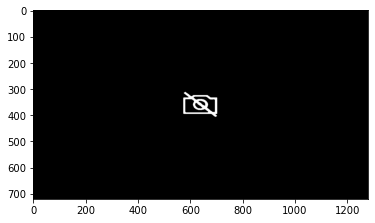

In [8]:
img=cv2.imread("test.jpeg")

grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY )
grey = cv2.threshold(grey, 200, 255, cv2.THRESH_BINARY)[1]

plt.imshow(grey,cmap="gray")

In [9]:
n,m= grey.shape

my_img=np.zeros((int(n),int(m)),dtype=np.int64)

grey=grey/255

print(n,m)

720 1280


In [10]:
def dir1(my_img,z,x,y,n,m):
    o=0
    if(z==0):
        if(y+1<m ):  
            if(grey[x][y+1]==1.):
                my_img[x][y+1]=1.
                y=y+1
                o=1
    if(z==1):
        if(x-1>=0 ):
            if( grey[x-1][y]==1.):
                my_img[x-1][y]=1.
                x=x-1
                o=1
    if(z==2):
        if(y-1>=0 ):
            if(grey[x][y-1]==1.):
                my_img[x][y-1]=1.
                y=y-1
                o=1
    if(z==3):
        if(x+1<n ):
            if(grey[x+1][y]==1.):
                my_img[x+1][y]=1.
                x=x+1
                o=1
    return(x,y,o)

In [11]:
def boundary(image , my_img):
  x=0
  y=0
  # o=0
  r=0
  di=3
  t=0
  h=0
  li1=[[0,0],[0,0]]
  li2=[[0,0],[0,0]]
  while(t==0 and x<n ):
    y=y+1
    if( np. all((image[x][:] == 0))):
      x=x+1
      y=0
    else:
      if(y==m):
        x=x+1
        y=0
      if(image[x][y]==1.):
        t=1
        my_img[x][y]=1.
        li1[0][0]=x
        li1[0][1]=y
        print(x,y)
  it1=0
  h=x*y
  op=h=h+1
  # my_img[x][y]=1
  dir=3
  while(r==0 and h<n*m):
    if([x,y]==li1[0]):
      li2[0][0]=x
      li2[0][1]=y
      it1=h
    if([x,y]==li1[1]and h==it1+1):
      r=1
    h=h+1
    # if(x<n and y<m and grey[x][y]==1):
    #   my_img[x][y]=1
    dir=(dir+3)%4
    x,y,o=dir1(my_img,dir,x,y,n,m) 
    # print(o)
    if(o==0):
      if(dir==3):
        dir=0
      else:
        dir=dir+1

   
    if(o==0):
      if(dir==3):
        
        x,y,o=dir1(my_img,dir,x,y,n,m)
        if(o==0):
          dir=0
      else:
        
        x,y,o=dir1(my_img,dir,x,y,n,m)
        if(o==0):
          dir=dir+1
    if(o==0):
      if(dir==3):
        
        x,y,o=dir1(my_img,dir,x,y,n,m)
        if(o==0):
          dir=0
      else:
        
        x,y,o=dir1(my_img,dir,x,y,n,m)
        if(o==0):
          dir=dir+1
    if(o==0):
      if(dir==3):
        
        x,y,o=dir1(my_img,dir,x,y,n,m)
        if(o==0):
          dir=0
      else:
        
        x,y,o=dir1(my_img,dir,x,y,n,m)
        if(o==0):
          dir=dir+1
    if(o==0):
      r=1
    if(o!=0):
      my_img[x][y]=1.
      if(h==op):
        li1[1][0]=x
        li2[1][1]=y
      

  plt.imshow(my_img,cmap="gray")  

312 580


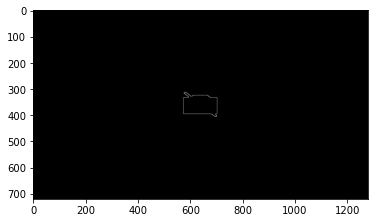

In [12]:
boundary(grey,my_img)